# Cricket Player Performance Prediction using machine learning

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cricket-world-cup-2019-players-data/Ground_Averages.csv
/kaggle/input/cricket-world-cup-2019-players-data/Batsman_Data.csv
/kaggle/input/cricket-world-cup-2019-players-data/WC_players.csv
/kaggle/input/cricket-world-cup-2019-players-data/ODI_Match_Totals.csv
/kaggle/input/cricket-world-cup-2019-players-data/ODI_Match_Results.csv
/kaggle/input/cricket-world-cup-2019-players-data/Bowler_data.csv


In [3]:
import numpy as np #(To perform mathematical calculations)
import matplotlib.pyplot as plt #(For Visualizations)
import seaborn as sns #(For Visualizations)
from sklearn.model_selection import train_test_split #for spliting the data
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder #scalling and encoding
from sklearn.linear_model import LogisticRegression, LinearRegression #linear regression model
import statsmodels.api as sm #importing stats
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor #importing decisiontree regressor
#from statsmodels.tsa.seasonal import seasonal_decompose 
import warnings
warnings.filterwarnings('ignore')

In [4]:
ground_data = pd.read_csv("/kaggle/input/cricket-world-cup-2019-players-data/Ground_Averages.csv",na_values = '-')
batsman_data = pd.read_csv("/kaggle/input/cricket-world-cup-2019-players-data/Batsman_Data.csv",na_values = '-')
wc_players = pd.read_csv("/kaggle/input/cricket-world-cup-2019-players-data/WC_players.csv",na_values = '-')
odi_total = pd.read_csv("/kaggle/input/cricket-world-cup-2019-players-data/ODI_Match_Totals.csv",na_values = '-')
odi_results = pd.read_csv("/kaggle/input/cricket-world-cup-2019-players-data/ODI_Match_Results.csv",na_values = '-')
bowler_data = pd.read_csv("/kaggle/input/cricket-world-cup-2019-players-data/Bowler_data.csv",na_values = '-')

In [5]:
ground_data.head(4)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81


In [6]:
ground_data.describe()

,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,7.792453,7.367925,0.094340,0.311321,3582.500000,112.103774,4031.896226,34.216604,5.458113
std,8.285061,8.022974,0.324501,0.622793,3575.148949,122.883602,4296.526140,11.367913,0.756841
min,1.000000,1.000000,0.000000,0.000000,209.000000,6.000000,252.000000,15.540000,3.880000
25%,2.250000,2.000000,0.000000,0.000000,1239.250000,34.000000,1229.000000,28.800000,4.990000
50%,5.000000,5.000000,0.000000,0.000000,2283.500000,75.000000,2777.500000,32.775000,5.440000
75%,10.000000,10.000000,0.000000,0.000000,4759.500000,137.250000,5279.500000,36.282500,5.757500
max,50.000000,50.000000,2.000000,3.000000,20917.000000,739.000000,26328.000000,120.160000,9.690000


In [7]:
# #checking the whitch age reported more fraud:
# data=ground_data.groupby('Ground').agg({'Won':'count'}).reset_index()

# fig, (ax1) = plt.subplots(1,1,figsize=(25, 10))
# graph =sns.barplot(x='Ground', y='Won', data = data, ax=ax1)

# graph.set_xticklabels(graph.get_xticklabels(),
#                     rotation=0,
#                     horizontalalignment='right'
#                     );

In [8]:
ground_data.isnull().sum()

Ground    0
Span      0
Mat       0
Won       0
Tied      0
NR        0
Runs      0
Wkts      0
Balls     0
Ave       0
RPO       0
dtype: int64

In [9]:
wc_players.head(3)

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan


In [10]:
batsman_data.head(4)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,NaN,NaN,NaN,NaN,NaN,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,NaN,NaN,NaN,NaN,NaN,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,NaN,NaN,NaN,NaN,NaN,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,NaN,NaN,NaN,NaN,NaN,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619


In [11]:
batsman_data["Bat1"].value_counts()

DNB     2043
0        655
1        338
2        260
4        229
        ... 
180*       1
145*       1
183*       1
109*       1
164        1
Name: Bat1, Length: 323, dtype: int64

In [12]:
batsman_data.shape

(11149, 13)

In [13]:
#Dropping all the values with 'Did not Bat (DNB)'
batsman_data.drop(batsman_data[batsman_data.Bat1 == 'DNB'].index, inplace=True)

In [14]:
batsman_data.drop(batsman_data[batsman_data.Bat1 == 'TDNB'].index, inplace=True)

In [15]:
batsman_data.drop(batsman_data[batsman_data.Bat1 == 'absent'].index, inplace=True)

In [16]:
batsman_data.drop(batsman_data[batsman_data.Bat1 == 'sub'].index, inplace=True)

In [17]:
batsman_data.isnull().sum()

Unnamed: 0      0
Bat1            0
Runs            0
BF              0
SR            100
4s              0
6s              0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Batsman         0
Player_ID       0
dtype: int64

In [18]:
# Filling null values
# with 0
batsman_data.fillna(value = 0, inplace = True)

In [19]:
batsman_data.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [20]:
#batsman_data['Bat1'] = batsman_data['Bat1'].str.replace('*', '.')

In [21]:
batsman_data["Bat1"].value_counts()

0       655
1       338
2       260
4       229
5       200
       ... 
180*      1
145*      1
183*      1
109*      1
164       1
Name: Bat1, Length: 319, dtype: int64

In [22]:
wc_players.head(4)

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan


In [23]:
odi_results.head(4)

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6


In [24]:
odi_total.head(4)

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6


In [25]:
batsman_data.dtypes

Unnamed: 0      int64
Bat1           object
Runs          float64
BF            float64
SR            float64
4s            float64
6s            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Batsman        object
Player_ID       int64
dtype: object

In [26]:
batsman_data.head(3)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0*,0.0,8.0,0.00,0.0,0.0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0*,0.0,0.0,0.00,0.0,0.0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1*,1.0,3.0,33.33,0.0,0.0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619


In [27]:
wc_players = wc_players.drop(['Player'], axis=1)

In [28]:
wc_players.rename(columns={'ID':'Player_ID'},inplace=True)
#wc_players.rename(columns={'Player':'Batsman'},inplace=True)

In [29]:
data = pd.merge(batsman_data, wc_players, on='Player_ID', how = 'left')

In [30]:
data.head(3)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,Country
0,6,0*,0.0,8.0,0.00,0.0,0.0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619,NaN
1,7,0*,0.0,0.0,0.00,0.0,0.0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619,NaN
2,10,1*,1.0,3.0,33.33,0.0,0.0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619,NaN


In [31]:
data.shape

(8918, 14)

In [32]:
data.isnull().sum()

Unnamed: 0     0
Bat1           0
Runs           0
BF             0
SR             0
4s             0
6s             0
Opposition     0
Ground         0
Start Date     0
Match_ID       0
Batsman        0
Player_ID      0
Country       44
dtype: int64

In [33]:
data.dropna(subset=['Country'], inplace=True)

In [34]:
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import plotly.io as pio
from plotly.subplots import make_subplots

In [35]:
data.groupby(['Batsman','Ground'])['Runs'].sum().sort_values(ascending=False).reset_index().head(6)
data.head(3)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID,Country
44,83,0,0.0,2.0,0.0,0.0,0.0,v India,Thiruvananthapuram,1 Nov 2018,ODI # 4064,Oshane Thomas,914567,WestIndies
45,84,0*,0.0,2.0,0.0,0.0,0.0,v Bangladesh,Dhaka,9 Dec 2018,ODI # 4071,Oshane Thomas,914567,WestIndies
46,89,0,0.0,1.0,0.0,0.0,0.0,v England,St George's,27 Feb 2019,ODI # 4099,Oshane Thomas,914567,WestIndies


# Batsman data analysis

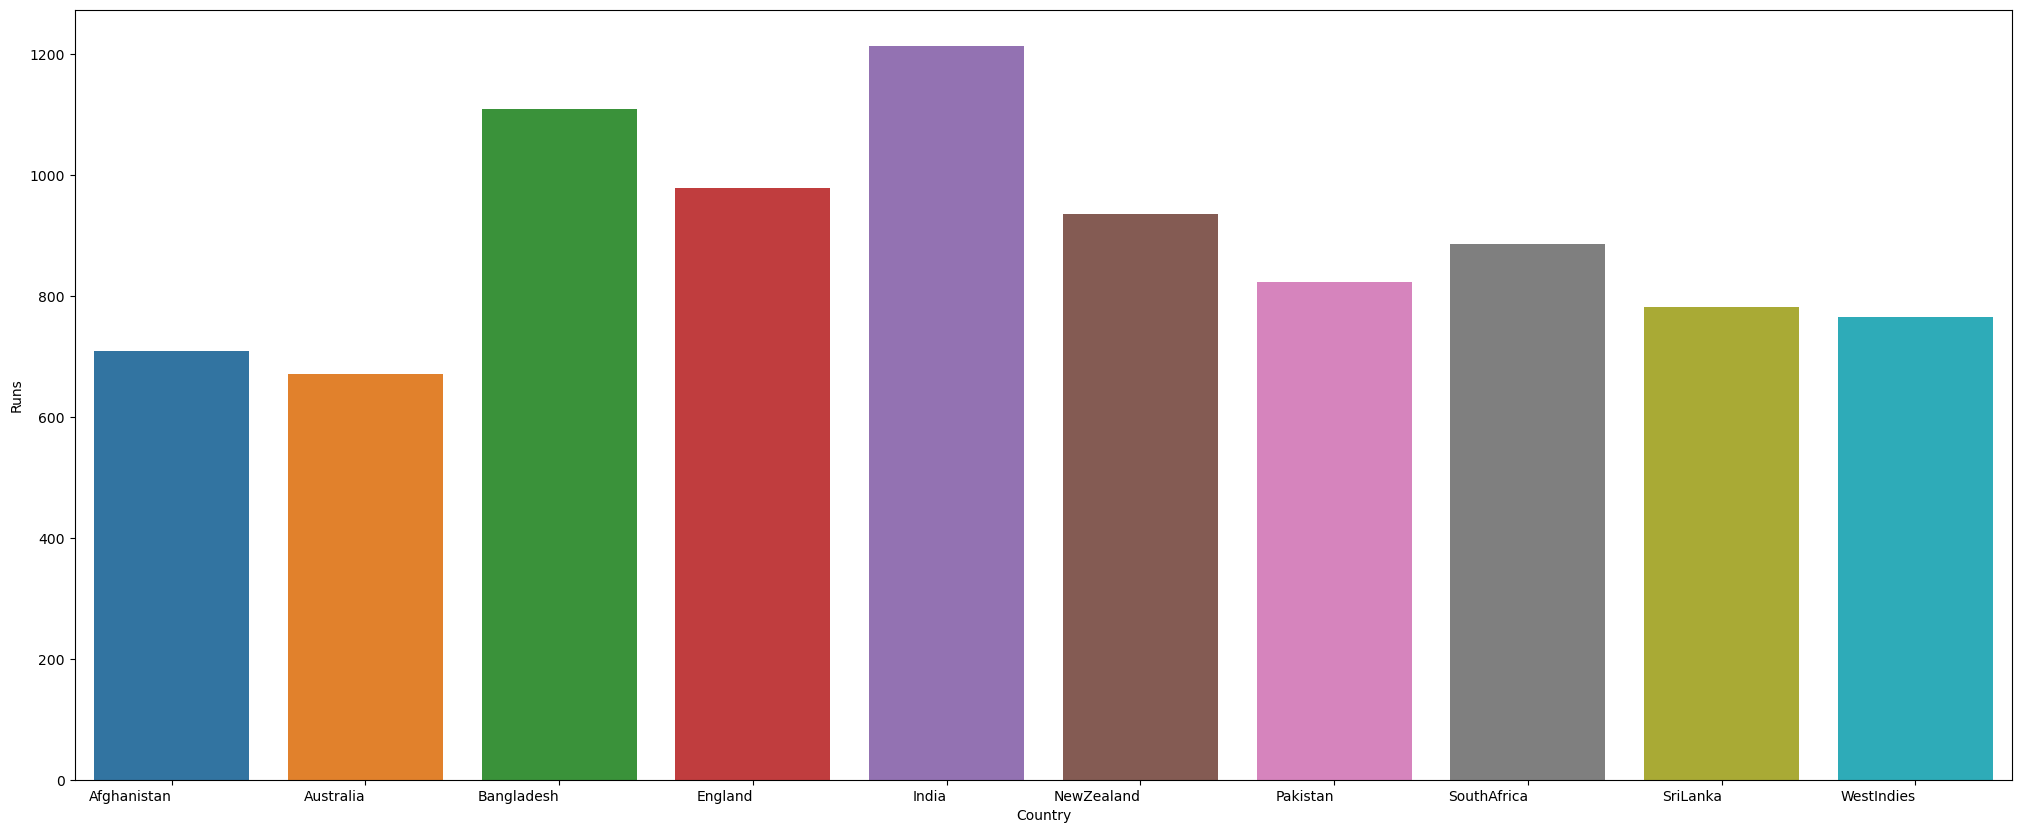

In [36]:

datax=data.groupby('Country').agg({'Runs':'count'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(25, 10))
graph =sns.barplot(x='Country', y='Runs', data = datax, ax=ax1)

graph.set_xticklabels(graph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

In [37]:
def plot_batting_chart(title, column, label):
    Runs = data.groupby(['Batsman','Country'])[column].sum().sort_values(ascending=False).reset_index().head(20)
    fig = px.bar(Runs, x='Batsman', y=column,
             hover_data=['Batsman', column], color='Country',
             labels={column: label},
             #color_discrete_map=team_colors,
             text=column)
    fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': Runs['Batsman'],'title' : 'Batsman', 'showgrid':False},
                      yaxis={'showgrid':False},
                     title = title)
    fig.show()

In [38]:
plot_batting_chart('Most Runs', 'Runs', 'Most Runs')

In [39]:
plot_batting_chart('Most 4s scored', '4s', 'Most 4s')

In [40]:
plot_batting_chart('Most 6s scored', '6s', 'Most 6s')

In [41]:
#batsman_data['Bat1']=batsman_data['Bat1'].astype(int)

In [42]:
#top_20_scores = batsman_data.nlargest(20, 'Bat1')

In [43]:
#Top 20 batsmen with highest macthes played
highest_matches_batsman = data['Batsman'].value_counts()[:20]
highest_matches_batsman

MS Dhoni             289
Chris Gayle          283
Shoaib Malik         254
Virat Kohli          219
Mohammad Hafeez      207
Eoin Morgan          206
Ross Taylor          203
Rohit Sharma         200
Tamim Iqbal          191
Mushfiqur Rahim      191
Shakib Al Hasan      186
JP Duminy            175
Angelo Mathews       173
Hashim Amla          171
Martin Guptill       166
Mahmudullah          151
Mashrafe Mortaza     151
Kane Williamson      133
Faf du Plessis       128
Shikhar Dhawan       127
Name: Batsman, dtype: int64

In [44]:
# sns.countplot(batsman_data["Batsman"]).set_title(" highest No.of matches for Batsman")
# plt.xticks(rotation = 60)

In [45]:
#Calculating Averages
def Out_or_NotOut(value):
    if "*" in value:
        return 0
    else:
        return 1
data["Out_or_NotOut"] = data.Bat1.apply(Out_or_NotOut)

In [46]:
change_type = ["Runs","BF","4s","6s"]
for i in change_type:
    data[i] = data[i].astype("int")
data.head()
Batsman_Data_Info = data
data = data.groupby(["Ground","Batsman","Country"]).sum().reset_index()

In [47]:
data["Average"] = data["Runs"]/data.Out_or_NotOut

In [48]:
data.sort_values(by=["Average"],ascending=False).head(3)

,Ground,Batsman,Country,Unnamed: 0,Runs,BF,SR,4s,6s,Player_ID,Out_or_NotOut,Average
1610,East London,Kagiso Rabada,SouthAfrica,2196,23,11,209.09,3,1,550215,0,inf
1184,Dehradun,Dawlat Zadran,Afghanistan,10911,2,3,66.66,0,0,516561,0,inf
3219,Roseau,Rubel Hossain,Bangladesh,8245,1,1,100.00,0,0,300619,0,inf


In [49]:
Batsman_Scores = data.groupby(["Batsman","Ground","Country"]).sum().reset_index()
Batsman_Scores["Average"] = Batsman_Scores["Runs"]/Batsman_Scores["Out_or_NotOut"]
Batsman_Scores.sort_values(by = "Average",ascending=False).head(4)

,Batsman,Ground,Country,Unnamed: 0,Runs,BF,SR,4s,6s,Player_ID,Out_or_NotOut,Average
2147,Marcus Stoinis,Ranchi,Australia,9644,31,26,119.23,4,0,325012,0,inf
646,Darren Bravo,Kanpur,WestIndies,503,51,53,96.22,4,2,277472,0,inf
2916,Ross Taylor,Port Elizabeth,NewZealand,4199,13,10,130.00,2,0,38699,0,inf
1967,Liam Plunkett,Gros Islet,England,7481,29,34,85.29,1,1,19264,0,inf


In [50]:
Batsman_avg = Batsman_Scores[(Batsman_Scores.Out_or_NotOut>0) & (Batsman_Scores.Average > 0 )]\
.sort_values(by = "Average",ascending = False)
Batsman_avg.head(5)

,Batsman,Ground,Country,Unnamed: 0,Runs,BF,SR,4s,6s,Player_ID,Out_or_NotOut,Average
2813,Rohit Sharma,Bulawayo,India,19599,279,309,267.90,17,7,102306,1,279.0
1004,Fakhar Zaman,Bulawayo,Pakistan,18495,515,462,592.57,65,6,2560955,2,257.5
3585,Virat Kohli,Birmingham,India,34084,243,210,483.46,26,4,1269010,1,243.0
1661,K. L. Rahul,Harare,India,18990,196,235,242.95,15,3,1266324,1,196.0
2713,Quinton de Kock,Kimberley,SouthAfrica,5930,193,173,205.14,22,4,758286,1,193.0


In [51]:
Batsman_avg["Strike_Rate"] = Batsman_avg["Runs"]/Batsman_avg["BF"]*100
Batsman_avg.head(5)

,Batsman,Ground,Country,Unnamed: 0,Runs,BF,SR,4s,6s,Player_ID,Out_or_NotOut,Average,Strike_Rate
2813,Rohit Sharma,Bulawayo,India,19599,279,309,267.90,17,7,102306,1,279.0,90.291262
1004,Fakhar Zaman,Bulawayo,Pakistan,18495,515,462,592.57,65,6,2560955,2,257.5,111.471861
3585,Virat Kohli,Birmingham,India,34084,243,210,483.46,26,4,1269010,1,243.0,115.714286
1661,K. L. Rahul,Harare,India,18990,196,235,242.95,15,3,1266324,1,196.0,83.404255
2713,Quinton de Kock,Kimberley,SouthAfrica,5930,193,173,205.14,22,4,758286,1,193.0,111.560694


In [52]:
def plot_batting_avg_chart(title, column, label):
    Runs = Batsman_avg.groupby(['Batsman','Country'])[column].mean().sort_values(ascending=False).reset_index().round(2).head(10)
    fig = px.bar(Runs, x='Batsman', y=column,
             hover_data=['Batsman', column], color='Country',
             labels={column: label},
             #color_discrete_map=team_colors,
             text=column)
    fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': Runs['Batsman'],'title' : 'Batsman', 'showgrid':False},
                      yaxis={'showgrid':False},
                     title = title)
    fig.show()

In [53]:
plot_batting_avg_chart('Best Strike_Rate', 'Strike_Rate','Best Strike_Rate')

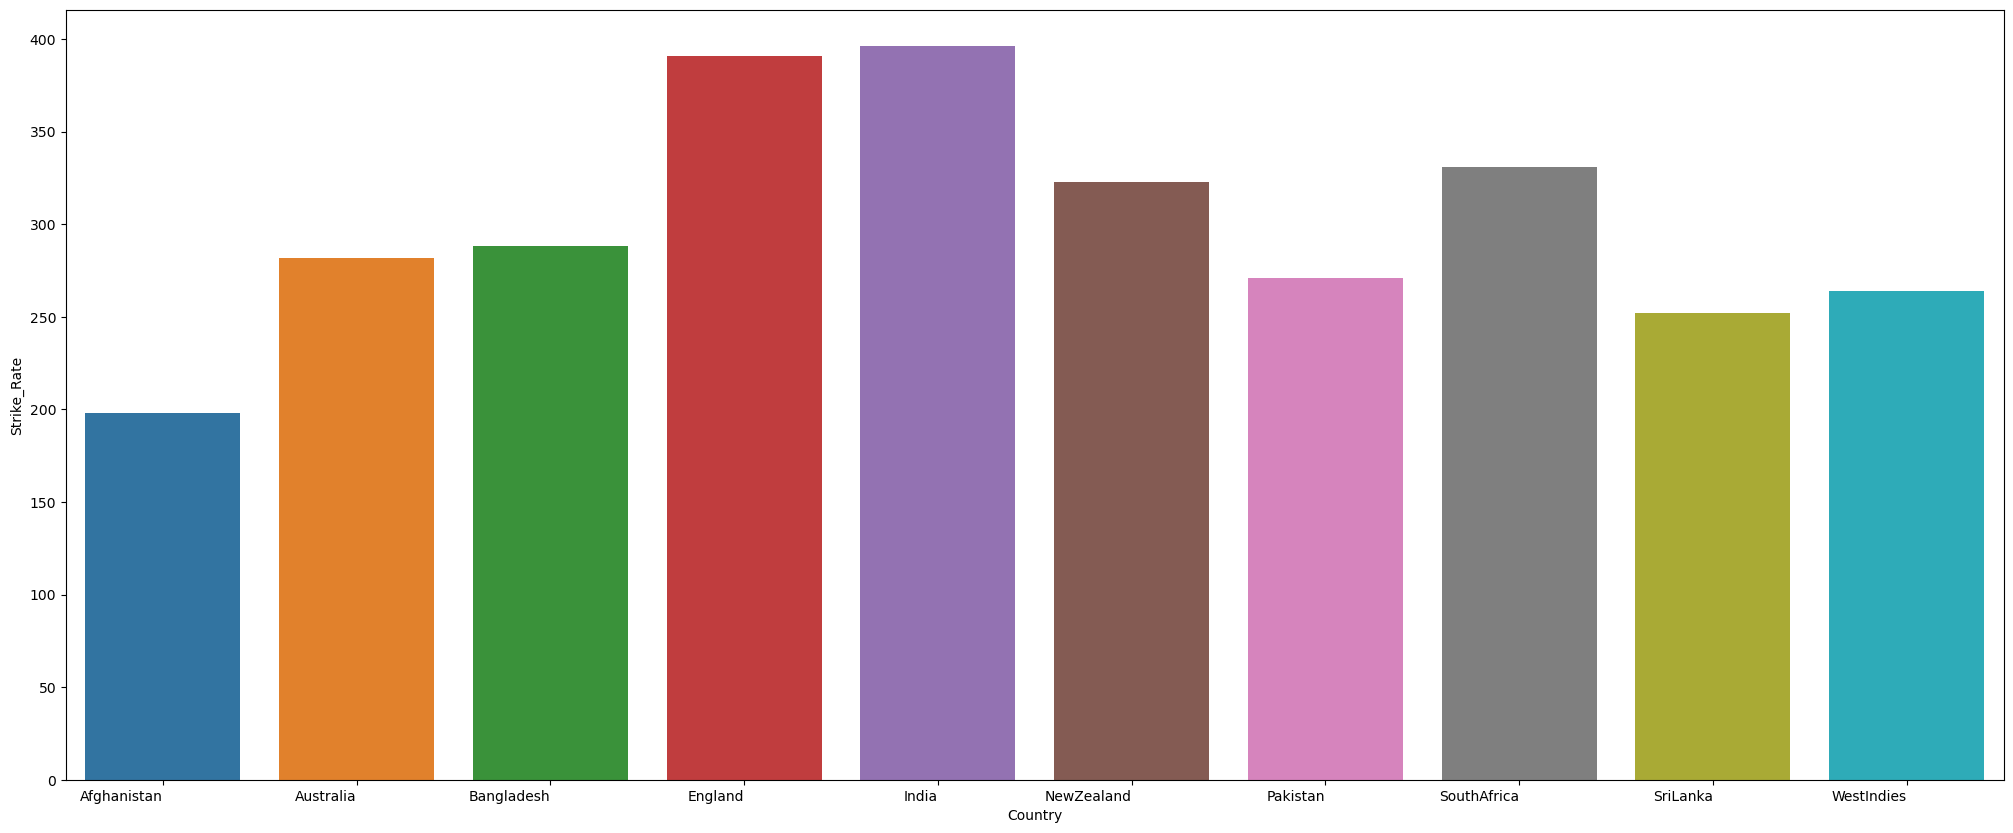

In [108]:

datax=Batsman_avg.groupby('Country').agg({'Strike_Rate':'count'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(25, 10))
graph =sns.barplot(x='Country', y='Strike_Rate', data = datax, ax=ax1)

graph.set_xticklabels(graph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

In [54]:
Batsman_avg.head(2)

,Batsman,Ground,Country,Unnamed: 0,Runs,BF,SR,4s,6s,Player_ID,Out_or_NotOut,Average,Strike_Rate
2813,Rohit Sharma,Bulawayo,India,19599,279,309,267.90,17,7,102306,1,279.0,90.291262
1004,Fakhar Zaman,Bulawayo,Pakistan,18495,515,462,592.57,65,6,2560955,2,257.5,111.471861


In [55]:
# sns.countplot(Batsman_avg["Country"]).set_title("No.of Best Batsman per Team")
# plt.xticks(rotation = 60)

In [56]:
df = Batsman_avg.copy()

In [57]:
df = df.drop(['Player_ID','Batsman','Unnamed: 0','Ground'], axis=1) 


In [58]:
df.head(4)

,Country,Runs,BF,SR,4s,6s,Out_or_NotOut,Average,Strike_Rate
2813,India,279,309,267.90,17,7,1,279.0,90.291262
1004,Pakistan,515,462,592.57,65,6,2,257.5,111.471861
3585,India,243,210,483.46,26,4,1,243.0,115.714286
1661,India,196,235,242.95,15,3,1,196.0,83.404255


In [59]:
df.dtypes

Country           object
Runs               int64
BF                 int64
SR               float64
4s                 int64
6s                 int64
Out_or_NotOut      int64
Average          float64
Strike_Rate      float64
dtype: object

In [60]:
# Dropping the target variable from data and storing the rest of the attributes in "X" and target attribute in "y":
X = df.drop(["Average"], axis = 1)
y = df["Average"]

In [61]:
# printing the shapes of X and y: 
print(X.shape, y.shape)

(2996, 8) (2996,)


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)#split the data

In [64]:
df.dtypes

Country           object
Runs               int64
BF                 int64
SR               float64
4s                 int64
6s                 int64
Out_or_NotOut      int64
Average          float64
Strike_Rate      float64
dtype: object

In [65]:
num_col=X_train.select_dtypes(['float64','int64']).columns
num_col

Index(['Runs', 'BF', 'SR', '4s', '6s', 'Out_or_NotOut', 'Strike_Rate'], dtype='object')

In [66]:
#defining categorical columns in data:
cat_columns=X_train.select_dtypes(['object']).columns
cat_columns

Index(['Country'], dtype='object')

In [67]:
#standardscaler for numerical columns
scaler = StandardScaler()                                                                                                                                                                                                                                                                                                                    
scaler.fit(X_train[num_col])

X_train_num = pd.DataFrame(scaler.transform(X_train[num_col]), columns=num_col)
X_test_num = pd.DataFrame(scaler.transform(X_test[num_col]), columns=num_col)

In [68]:
#ohe = OneHotEncoder()
ohe = OneHotEncoder(handle_unknown='ignore', drop = "first")
ohe.fit(X_train[cat_columns])

columns_ohe = list(ohe.get_feature_names_out(cat_columns))

In [69]:
X_train_cat = ohe.transform(X_train[cat_columns])
X_test_cat  = ohe.transform(X_test[cat_columns])

In [70]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat  = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

In [71]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

# LinearRegression

In [72]:
from sklearn import datasets, linear_model, metrics

In [73]:
reg = linear_model.LinearRegression()

In [74]:
reg.fit(X_train, y_train)

LinearRegression()

In [75]:
y_train_lr = reg.predict(X_train)
y_test_lr = reg.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
rmse_train_lr = mean_squared_error(y_train,y_train_lr )
rmse_test_lr  = mean_squared_error(y_test,y_test_lr )

In [78]:
print(f'train MSE : {rmse_train_lr}')
print(f'test MSE : {rmse_test_lr}')

train MSE : 442.1632397392594
test MSE : 319.4331285105719


# Decession Trees

In [79]:
model = DecisionTreeRegressor(random_state = 0) 

In [80]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [81]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [82]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test, y_pred_test)

In [83]:
print(f'train MSE : {mse_train}')
print(f'test MSE : {mse_test}')

train MSE : 0.0
test MSE : 12.29863811796008


# RandomForestRegressor

In [84]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [85]:
rf = RandomForestRegressor()

In [86]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [88]:
mse_train_rf = mean_squared_error(y_train, train_pred)
mse_test_rf = mean_squared_error(y_test, test_pred)

In [89]:
print(f'train MSE : {mse_train_rf}')
print(f'test MSE : {mse_test_rf}')

train MSE : 1.451967102201454
test MSE : 3.160962969438207


# test_data

In [90]:
final_pred = rf.predict(X_test)

In [91]:
final_pred

array([102.55      ,  32.        ,  48.96      , 118.83      ,
        17.        ,   8.48      ,   1.        ,  80.78      ,
        22.        ,  23.01      ,  29.005     ,   3.995     ,
        60.        ,  47.62      ,  12.185     ,   5.        ,
        32.0655    , 115.16      ,   2.93      ,  81.76      ,
        12.        ,  94.02      ,  41.99      ,  14.        ,
       151.32      ,  35.99      ,  23.        ,   9.        ,
        77.935     ,  22.665     ,  63.06      ,  24.99      ,
        10.80333333,  55.02      ,  38.06      ,  50.7935    ,
         8.        ,  35.245     ,   6.        , 110.56      ,
        32.        ,  57.        ,  28.        ,  36.46      ,
        28.        ,  29.        ,  23.        ,  23.20333333,
        69.06416667,  38.        ,   7.995     , 143.71      ,
        24.        ,   1.        ,  23.        ,  12.52      ,
        66.09      ,  30.        ,  44.        ,  13.52      ,
        37.02      ,  14.30666667,  17.        ,   1.  

In [92]:
final_pred=pd.DataFrame(final_pred)

In [93]:
Final_data = pd.concat([Batsman_avg['Batsman'],final_pred],axis = 1).dropna()

In [94]:
Final_data.rename(columns={0:'pred_avg'},inplace=True)

In [95]:
Final_data.head(5)

,Batsman,pred_avg
317,Babar Azam,29.000000
464,Chris Gayle,2.000000
483,Chris Gayle,30.455000
18,Aaron Finch,2.930000
551,Chris Woakes,63.706377


# Bowler_data analysis

In [96]:
bowler_data.head(3)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0.0,57.0,0.0,7.12,NaN,NaN,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0.0,55.0,2.0,5.50,27.5,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619


In [97]:
bowler_data.isnull().sum()

Unnamed: 0       0
Overs         5270
Mdns          5270
Runs          5270
Wkts          5270
Econ          5270
Ave           7498
SR            7498
Opposition       0
Ground           0
Start Date       0
Match_ID         0
Bowler           0
Player_ID        0
dtype: int64

In [98]:
wc_players.head(3)

,Player_ID,Country
0,352048,Afghanistan
1,793463,Afghanistan
2,440963,Afghanistan


In [99]:
bowlers = pd.merge(bowler_data, wc_players, on='Player_ID', how = 'left')

In [100]:
#Dropping all the values with '-' in Overs
bowlers.drop(bowlers[bowlers.Overs == 'NaN'].index, inplace=True)

In [101]:
bowlers.isnull().sum()

Unnamed: 0       0
Overs         5270
Mdns          5270
Runs          5270
Wkts          5270
Econ          5270
Ave           7498
SR            7498
Opposition       0
Ground           0
Start Date       0
Match_ID         0
Bowler           0
Player_ID        0
Country         81
dtype: int64

In [102]:
bowlers.dropna(subset=['Country'], inplace=True)

In [103]:
bowlers.head(3)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID,Country
81,82,9.0,0.0,83.0,1.0,9.22,83.0,54.0,v India,Guwahati,21 Oct 2018,ODI # 4056,Oshane Thomas,914567,WestIndies
82,83,4.0,0.0,33.0,1.0,8.25,33.0,24.0,v India,Thiruvananthapuram,1 Nov 2018,ODI # 4064,Oshane Thomas,914567,WestIndies
83,84,5.0,0.0,34.0,1.0,6.80,34.0,30.0,v Bangladesh,Dhaka,9 Dec 2018,ODI # 4071,Oshane Thomas,914567,WestIndies


In [104]:
def plot_bowling_chart(title, column, label):
    wickets = bowlers.groupby(['Bowler','Country'])[column].sum().sort_values(ascending=False).reset_index().head(10)
    fig = px.bar(wickets, x='Bowler', y=column,
             hover_data=['Bowler', column], color='Country',
             labels={column: label},
             #color_discrete_map=team_colors,
             text=column)
    fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': wickets['Bowler'],'title' : 'Bowler','showgrid':False},
                      yaxis={'showgrid':False},
                     title = title)
    fig.show()

In [105]:
plot_bowling_chart('Most Wkts','Wkts','Most Wkts')

In [106]:
plot_bowling_chart('Most Mdns balls bowled','Mdns','Most Mdns')

In [107]:
plot_bowling_chart('Most Runs balls bowled','Runs','Most Runs')

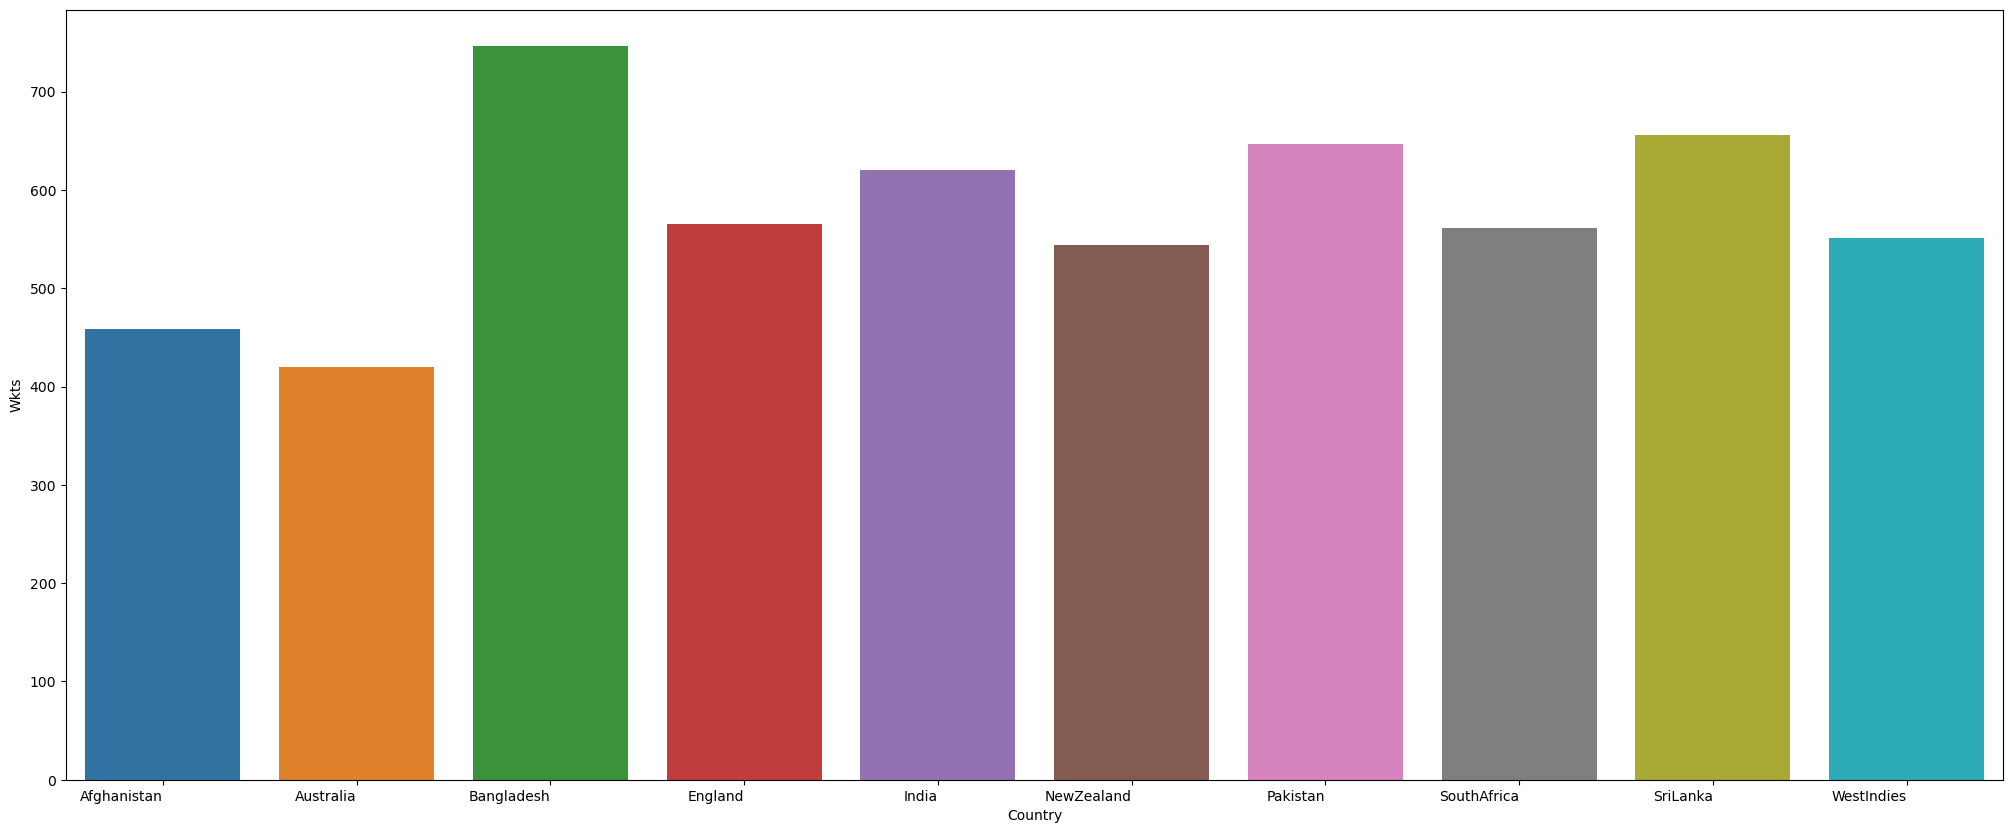

In [110]:
#checking the whitch age reported more fraud:
datax=bowlers.groupby('Country').agg({'Wkts':'count'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(25, 10))
graph =sns.barplot(x='Country', y='Wkts', data = datax, ax=ax1)

graph.set_xticklabels(graph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

england took a highest wikets in odi